In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Store file path in variable
happiness_unemployment_file = "Resources/happiness_unemployment_yearly.csv"

# Read Data files with the pandas library
happiness_unemployment_df = pd.read_csv(happiness_unemployment_file, encoding="UTF-8")
happiness_unemployment_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,3.178,3.323,3.088,2.547,2.306,2.8884
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,3.992,3.008,2.825,2.742,3.550,3.2234
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,6.283,6.000,5.808,5.117,5.042,5.6500
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,4.531,4.740,4.216,3.854,3.728,4.2138
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,6.900,6.992,6.342,5.833,5.667,6.3468


### Check for Outliers in Average Happiness Scores and Average Unemployment Rate
* If found, create visuals to display outliers
* Create a clean dataframe that does not contain any outliers and use for further analysis

In [3]:
# Check for outliers in Avg. Happiness Data
# Create a variable to hold avg. happiness data
happiness_data = happiness_unemployment_df['Avg Happiness']

# add subset 
quartiles = happiness_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create a variable to hold data for potential outliers
outlier_happiness_data = happiness_data.loc[(happiness_data < lower_bound) | (happiness_data > upper_bound)]
print(outlier_happiness_data)

Series([], Name: Avg Happiness, dtype: float64)


In [4]:
# Check for outliers in Avg. Unemployment Data
# Create a variable to hold avg. unemployment data
unemployment_data = happiness_unemployment_df['Avg. Unemployment']

# add subset 
quartiles = unemployment_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create a variable to hold data for potential outliers
outlier_unemployment_data = unemployment_data.loc[(unemployment_data < lower_bound) | \
                                                  (unemployment_data > upper_bound)]
print(outlier_unemployment_data)

31    17.6556
54    29.2400
71    21.5400
74    21.3050
79    27.0700
80    19.3600
Name: Avg. Unemployment, dtype: float64


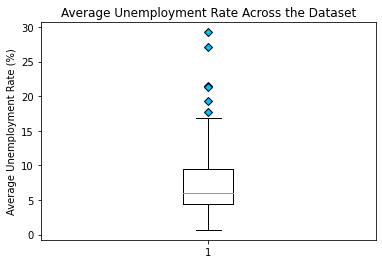

In [5]:
# Create a Box and Whisker plot to display potential outliers in average unemployment rates
blue_diamond = dict(markerfacecolor='deepskyblue', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Average Unemployment Rate Across the Dataset')
ax1.set_ylabel('Average Unemployment Rate (%)')
ax1.boxplot(happiness_unemployment_df['Avg. Unemployment'], flierprops = blue_diamond)
plt.show()

In [6]:
# Convert outlier information to dataframe
outlier_unemployment_data_df = pd.DataFrame(outlier_unemployment_data)
outlier_unemployment_data_df

,Avg. Unemployment
31,17.6556
54,29.2400
71,21.5400
74,21.3050
79,27.0700
80,19.3600


#### Pull happiness and unemployment data for potential outliers

In [7]:
# Determine columns that are only in one DataFrame and use this to select a subset of columns in the merge
cols_to_use = happiness_unemployment_df.columns.difference(outlier_unemployment_data_df.columns)

In [8]:
# Merge DataFrames to get information for countries with unemployment rates that are potential outliers
outlier_info_df = outlier_unemployment_data_df.merge(happiness_unemployment_df[cols_to_use], how = 'inner', \
                                                     left_index = True, right_index = True)
outlier_info_df

,Avg. Unemployment,Avg Happiness,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
31,17.6556,6.3514,Spain,6.329,6.361,6.403,6.310,6.354,22.058,19.635,17.225,15.255,14.105
54,29.2400,5.6062,Kosovo,5.589,5.401,5.279,5.662,6.100,32.900,27.500,30.500,29.600,25.700
71,21.5400,5.1618,Bosnia and Herzegovina,4.949,5.163,5.182,5.129,5.386,27.700,25.400,20.500,18.400,15.700
74,21.3050,5.1524,Greece,4.857,5.033,5.227,5.358,5.287,24.900,23.550,21.450,19.300,17.325
79,27.0700,4.6752,South Africa,4.642,4.459,4.829,4.724,4.722,25.350,26.725,27.450,27.125,28.700
80,19.3600,4.3932,Armenia,4.350,4.360,4.376,4.321,4.559,18.500,18.000,20.900,20.500,18.900


#### Create a new DataFrame that does not contain any potential outliers

In [9]:
# Create a DataFrame that contains records from both DataFrames
merged_df = happiness_unemployment_df.merge(outlier_unemployment_data_df, how = 'outer',\
                                            left_index = True, right_index = True, \
                                            indicator = True, suffixes=(None, '_y'))

# Create a DataFrame that only contains information contained in the left DataFrame (happiness_unemployment_df)
# This only returns records that are not potential outliers
happ_unemp_updated_df = merged_df[merged_df['_merge']=='left_only']

# Remove additional columns that would not be used for later analysis
happ_unemp_updated_df.drop(columns = ['Avg. Unemployment_y', '_merge'], inplace = True)
happ_unemp_updated_df.head()

C:\Users\bisma\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,3.178,3.323,3.088,2.547,2.306,2.8884
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,3.992,3.008,2.825,2.742,3.550,3.2234
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,6.283,6.000,5.808,5.117,5.042,5.6500
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,4.531,4.740,4.216,3.854,3.728,4.2138
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,6.900,6.992,6.342,5.833,5.667,6.3468


### Create Visuals to study potential trends in Unemployment Rate and Happiness scores

The correlation between both factors is -0.36


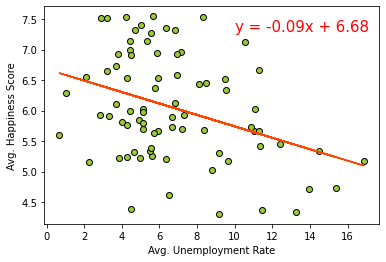

In [10]:
# Declare x_values and y_values
x_values = happ_unemp_updated_df['Avg. Unemployment']
y_values = happ_unemp_updated_df['Avg Happiness']

# x_values = happ_unemp_updated_df.iloc[:,12]
# y_values = happ_unemp_updated_df.iloc[:,6]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = "black")
plt.plot(x_values,regress_values,"orangered")

# Label plot
plt.annotate(line_eq,(10,7.3),fontsize=15,color="red")
plt.xlabel('Avg. Unemployment Rate')
plt.ylabel('Avg. Happiness Score')
plt.show()

In [11]:
# Pull in average happiness data
happiness_file = "../Happiness/Resources/happiness_sample.csv"
sample_happiness_df = pd.read_csv(happiness_file, encoding = "UTF-8")
sample_happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
0,Spain,6.329,6.361,6.403,6.310,6.354
1,Mexico,7.187,6.778,6.578,6.488,6.595
2,Tunisia,4.739,5.045,4.805,4.592,4.461
3,Jamaica,5.709,5.510,5.311,5.890,5.890
4,Argentina,6.574,6.650,6.599,6.388,6.086


In [12]:
# Determine columns that are only in one DataFrame and use this to select a subset of columns in the merge
cols_unique = happiness_unemployment_df.columns.difference(sample_happiness_df.columns)

In [13]:
# Merge DataFrames to get unemployment information for countries in happiness sample
sample_unemp_merged_df = sample_happiness_df.merge(happiness_unemployment_df[cols_to_use], how = 'inner', \
                                                   on = 'Country')
sample_unemp_merged_df

,Country,Happiness Score_2015_x,Happiness Score_2016_x,Happiness Score_2017_x,Happiness Score_2018_x,Happiness Score_2019_x,Avg Happiness,Happiness Score_2015_y,Happiness Score_2016_y,Happiness Score_2017_y,Happiness Score_2018_y,Happiness Score_2019_y,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
0,Spain,6.329,6.361,6.403,6.310,6.354,6.3514,6.329,6.361,6.403,6.310,6.354,22.058,19.635,17.225,15.255,14.105
1,Mexico,7.187,6.778,6.578,6.488,6.595,6.7252,7.187,6.778,6.578,6.488,6.595,4.349,3.883,3.423,3.331,3.493
2,Tunisia,4.739,5.045,4.805,4.592,4.461,4.7284,4.739,5.045,4.805,4.592,4.461,15.390,15.544,15.513,15.530,14.889
3,Jamaica,5.709,5.510,5.311,5.890,5.890,5.6620,5.709,5.510,5.311,5.890,5.890,13.500,13.200,11.650,9.125,7.700
4,Argentina,6.574,6.650,6.599,6.388,6.086,6.4594,6.574,6.650,6.599,6.388,6.086,6.533,8.467,8.350,9.200,9.825


In [14]:
# Create new DataFrame to filter out unwanted columns
sample_unemp_info_df = sample_unemp_merged_df[['Country', 'Unemp. Rate_2015', 'Unemp. Rate_2016',\
                                               'Unemp. Rate_2017', 'Unemp. Rate_2018', 'Unemp. Rate_2019']]
sample_unemp_info_df.set_index('Country', inplace = True)
sample_unemp_info_df

,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
Country,,,,,
Spain,22.058,19.635,17.225,15.255,14.105
Mexico,4.349,3.883,3.423,3.331,3.493
Tunisia,15.390,15.544,15.513,15.530,14.889
Jamaica,13.500,13.200,11.650,9.125,7.700
Argentina,6.533,8.467,8.350,9.200,9.825


In [15]:
# Create variables for names of different countries in the sample
country_1_name = sample_unemp_info_df.index[0]
country_2_name = sample_unemp_info_df.index[1]
country_3_name = sample_unemp_info_df.index[2]
country_4_name = sample_unemp_info_df.index[3]
country_5_name = sample_unemp_info_df.index[4]

In [16]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = sample_unemp_info_df.iloc[0].values
country_2_info = sample_unemp_info_df.iloc[1].values
country_3_info = sample_unemp_info_df.iloc[2].values
country_4_info = sample_unemp_info_df.iloc[3].values
country_5_info = sample_unemp_info_df.iloc[4].values

In [17]:
# Create a DataFrame to display Happiness Scores over time for sample countries
year = ['2015', '2016', '2017', '2018', '2019']
sample_unemployment_df = pd.DataFrame({country_1_name: country_1_info,\
                                        country_2_name: country_2_info,\
                                        country_3_name: country_3_info,\
                                        country_4_name: country_4_info,\
                                        country_5_name: country_5_info,\
                                        "Year":year})
sample_unemployment_df.set_index("Year", inplace = True)
sample_unemployment_df

,Spain,Mexico,Tunisia,Jamaica,Argentina
Year,,,,,
2015,22.058,4.349,15.390,13.500,6.533
2016,19.635,3.883,15.544,13.200,8.467
2017,17.225,3.423,15.513,11.650,8.350
2018,15.255,3.331,15.530,9.125,9.200
2019,14.105,3.493,14.889,7.700,9.825


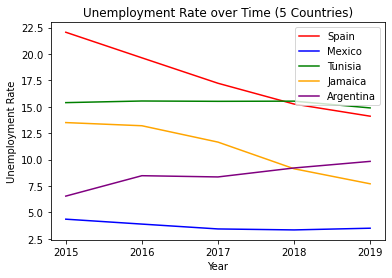

In [18]:
# Add labels to X and Y axes :: Add title
plt.title("Unemployment Rate over Time (5 Countries)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "purple", label= country_5_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5], loc="best")